# VpC - Trabajo Práctico 2

### Algoritmo que dada una imagen, o región, calcula la métrica propuesta en el paper "Image Sharpness Measure for Blurred Images in Frequency Domain“

El código de los algoritmos puede verse en el archivo *sharpness_algorithms.py*.

In [ ]:
# Soporte colab

import sys
import os

# Detectar si estamos en Colab

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("Entorno Colab detectado. Configurando proyecto...")

    # Clonar repo solo si no existe
    repo_url = "https://github.com/jbrazonath/VpComp.git" 
    repo_name = "VpComp"  # Carpeta raíz del repo

    if not os.path.exists(repo_name):
        !git clone {repo_url}

    # Ruta a la carpeta TP2 dentro del repo
    tp2_path = os.path.join(repo_name, "Tp2")

    # Añadir TP2 al sys.path para importar scripts desde allí
    if tp2_path not in sys.path:
        sys.path.append(tp2_path)

    print(f"Setup completado. Se puede importar desde: {tp2_path}")

else:
    print("No se está ejecutando en Colab. Se asume que los archivos ya están localmente.")



No se está ejecutando en Colab. Se asume que los archivos ya están localmente.


In [28]:
# Librerías

import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Video
from sharpness_algorithms import fm_sharpness_video, fm_sharpness_roi_video, fm_sharpness_grid_video
from laplacian_variance_algorithms import lv_laplacian_variance_video, lv_laplacian_variance_roi_video, lv_laplacian_variance_grid_video

In [29]:
# Video

video_path = "focus_video.mov"
Video(video_path, width=400)

#### Medición sobre todo el frame

FM máximo      : 0.028016
Frame          : 109


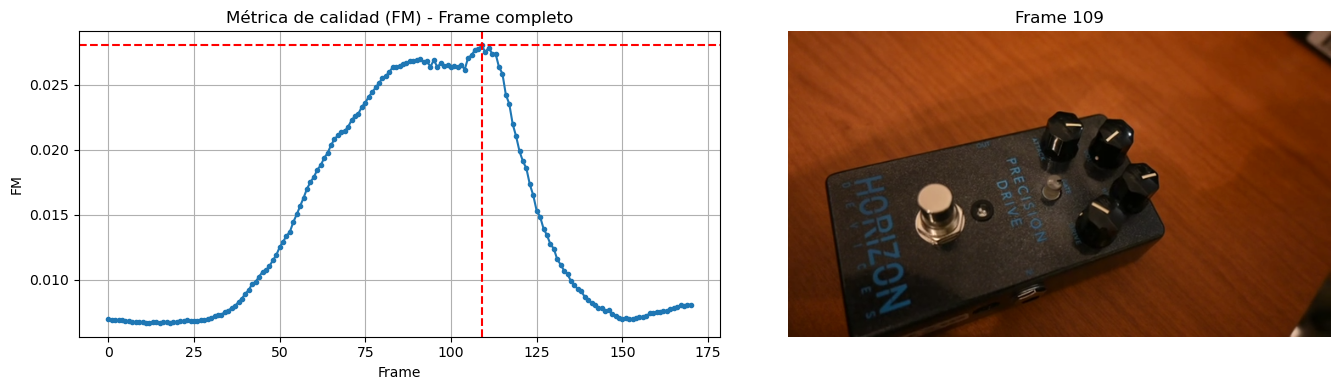

In [30]:
# Obtiene los valores de fm para todos los frames y el valor máximo

fm_values, frame_numbers, fm_max, fm_frame = fm_sharpness_video(video_path)

print(f"{'FM máximo':15}: {fm_max:.6f}")
print(f"{'Frame':15}: {fm_frame}")

# --- Cargar el frame del máximo ---
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, fm_frame)
ret, frame_max_img = cap.read()
cap.release()

# Convertir a RGB para matplotlib
frame_max_img = cv2.cvtColor(frame_max_img, cv2.COLOR_BGR2RGB)

# --- Gráfico combinado ---
plt.figure(figsize=(14,4))

# Subplot izquierda: curva FM
plt.subplot(1, 2, 1)
plt.plot(frame_numbers, fm_values, marker='.')
plt.axhline(y=fm_max, color='red', linestyle='--', linewidth=1.5)
plt.axvline(x=fm_frame, color='red', linestyle='--', linewidth=1.5)
plt.title("Métrica de calidad (FM) - Frame completo")
plt.xlabel("Frame")
plt.ylabel("FM")
plt.grid(True)

# Subplot derecha: solo el frame 
plt.subplot(1, 2, 2)
plt.imshow(frame_max_img)
plt.title(f"Frame {fm_frame}")
plt.axis("off")

plt.tight_layout()
plt.show()


#### Medición sobre una ROI ubicada en el centro del frame.

FM máximo      : 0.345556
Frame          : 111


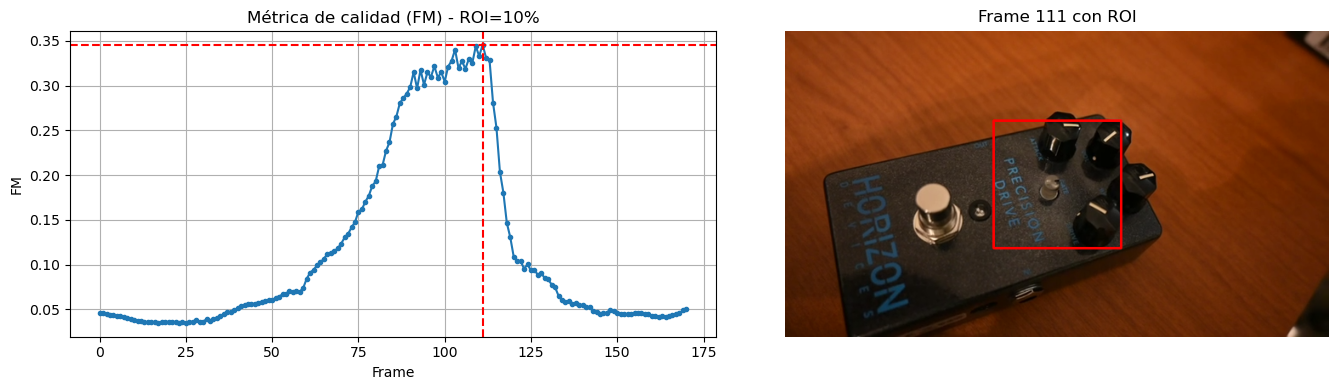

In [31]:
# Obtiene los valores de fm para todos los frames y el valor máximo con una roi centrada del 10% 

fm_values, frame_numbers, fm_max, fm_frame, rect = fm_sharpness_roi_video(video_path, roi=0.1)

print(f"{'FM máximo':15}: {fm_max:.6f}")
print(f"{'Frame':15}: {fm_frame}")

# --- Cargar el frame del máximo ---
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, fm_frame)
ret, frame_max_img = cap.read()
cap.release()

# Convertir a RGB para matplotlib
frame_max_img = cv2.cvtColor(frame_max_img, cv2.COLOR_BGR2RGB)

# Dibujar ROI
x1, y1, x2, y2 = rect
frame_max_draw = frame_max_img.copy()
cv2.rectangle(frame_max_draw, (x1, y1), (x2, y2), (255, 0, 0), 2)

# --- Gráfico combinado ---
plt.figure(figsize=(14,4))

# Subplot izquierda: curva FM
plt.subplot(1, 2, 1)
plt.plot(frame_numbers, fm_values, marker='.')
plt.axhline(y=fm_max, color='red', linestyle='--', linewidth=1.5)
plt.axvline(x=fm_frame, color='red', linestyle='--', linewidth=1.5)
plt.title("Métrica de calidad (FM) - ROI=10%")
plt.xlabel("Frame")
plt.ylabel("FM")
plt.grid(True)

# Subplot derecha: frame con ROI
plt.subplot(1, 2, 2)
plt.imshow(frame_max_draw)
plt.title(f"Frame {fm_frame} con ROI")
plt.axis("off")

plt.tight_layout()
plt.show()

#### Medición sobre una grilla de MxN equidistante centrada en el frame.


--- Analizando grilla 3x3 ---
FM máximo      : 0.581983
Frame          : 111
Rect max       : (284, 144, 356, 216)


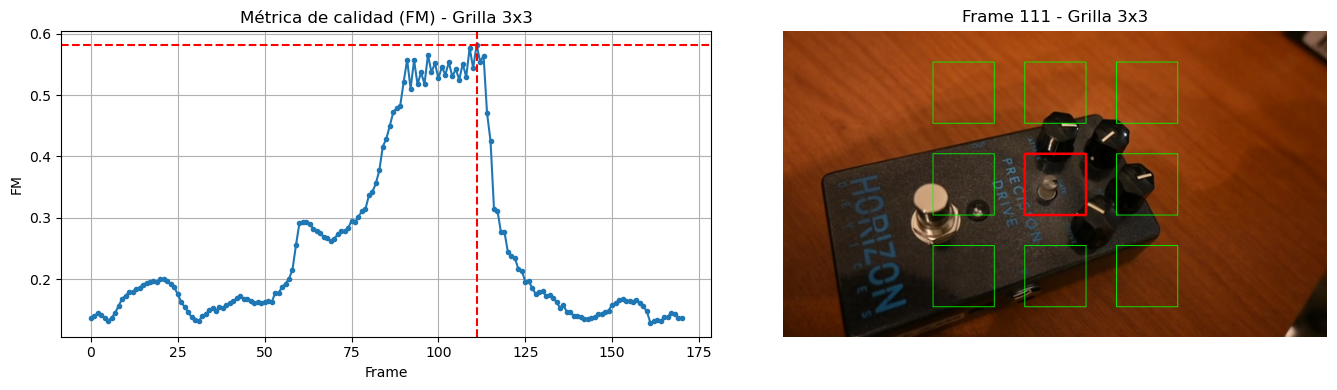


--- Analizando grilla 5x7 ---
FM máximo      : 0.868642
Frame          : 91
Rect max       : (295, 89, 340, 134)


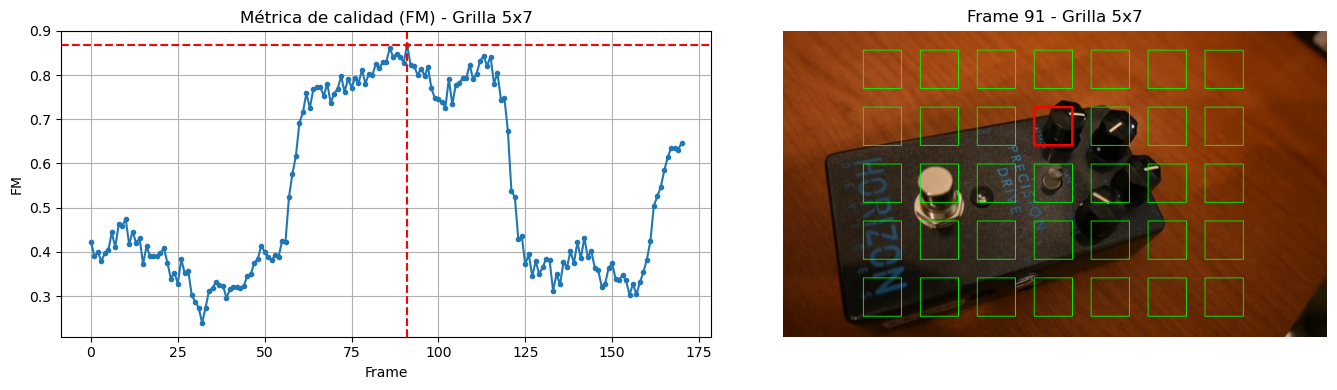


--- Analizando grilla 6x12 ---
FM máximo      : 0.961938
Frame          : 98
Rect max       : (379, 137, 413, 171)


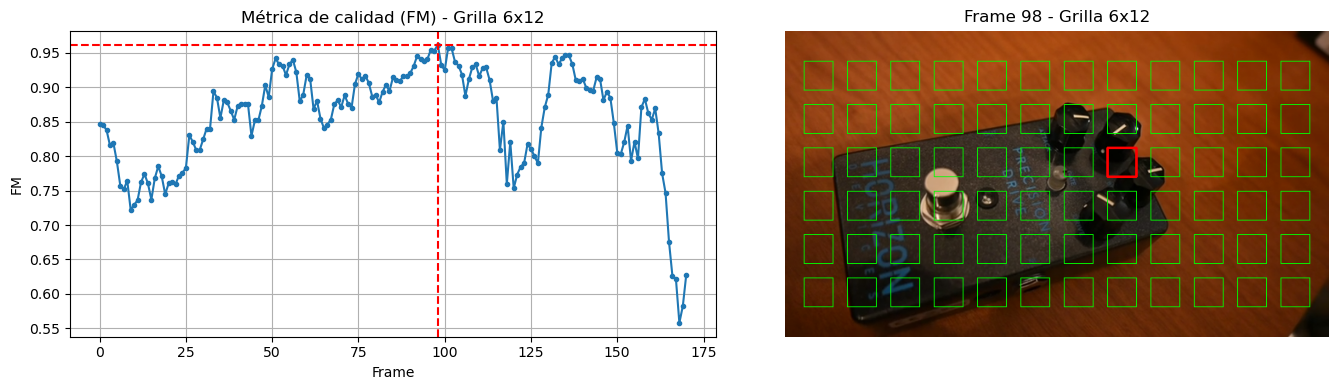

In [32]:
# --- Definir los tamaños de grilla que quieres probar ---
grid_sizes = [(3, 3), (5, 7), (6, 12)]

for N, M in grid_sizes:
    print(f"\n--- Analizando grilla {N}x{M} ---")

    # --- Obtener métricas del video ---
    fm_values, frame_numbers, fm_max, frame_max, rect_max, rect_matrices = fm_sharpness_grid_video(
        video_path, N=N, M=M
    )

    print(f"{'FM máximo':15}: {fm_max:.6f}")
    print(f"{'Frame':15}: {frame_max}")
    print(f"{'Rect max':15}: {rect_max}")

    # --- Cargar el frame del máximo ---
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_max)
    ret, frame_img = cap.read()
    cap.release()

    frame_rgb = cv2.cvtColor(frame_img, cv2.COLOR_BGR2RGB)

    # --- Dibujar grilla completa y rect max ---
    frame_draw = frame_rgb.copy()
    rect_matrix = rect_matrices[frame_max]

    # Dibujar TODA la grilla (verde)
    for i in range(N):
        for j in range(M):
            x1, y1, x2, y2 = rect_matrix[i, j]
            cv2.rectangle(frame_draw, (x1, y1), (x2, y2), (0, 255, 0), 1)

    # Dibujar SOLO el rectángulo máximo en rojo
    x1, y1, x2, y2 = rect_max
    cv2.rectangle(frame_draw, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # --- GRÁFICO combinado ---
    plt.figure(figsize=(14, 4))

    # Subplot izquierda: curva FM
    plt.subplot(1, 2, 1)
    plt.plot(frame_numbers, fm_values, marker='.')
    plt.axhline(y=fm_max, color='red', linestyle='--', linewidth=1.5)
    plt.axvline(x=frame_max, color='red', linestyle='--', linewidth=1.5)
    plt.title(f"Métrica de calidad (FM) - Grilla {N}x{M}")
    plt.xlabel("Frame")
    plt.ylabel("FM")
    plt.grid(True)

    # Subplot derecha: frame con grilla y celda máxima
    plt.subplot(1, 2, 2)
    plt.imshow(frame_draw)
    plt.title(f"Frame {frame_max} - Grilla {N}x{M}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


### Algoritmo de Varianza del Laplaciano seleccionado de "Analysis of focus measure operators in shapefrom focus“

La varianza del laplaciano es un método que se utiliza para medir la nitidez o el desenfoque de una imagen. Cuantifica la cantidad de bordes presentes en una imagen calculando la varianza de la imagen filtrada con el laplaciano. Una varianza mayor indica una imagen más nítida con más bordes, mientras que una varianza menor sugiere una imagen más borrosa con menos bordes.

El código de los algoritmos puede verse en el archivo *laplacian_variance_algorithms.py*.

#### Medición sobre todo el frame

LV máximo      : 108.701792
Frame          : 111


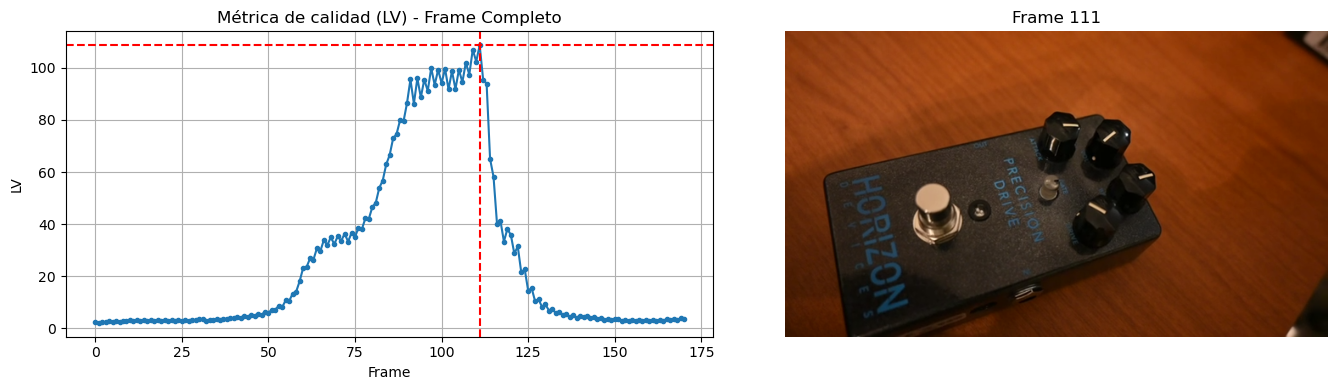

In [33]:
# Obtiene los valores de lv para todos los frames y el valor máximo

lv_values, frame_numbers, lv_max, lv_frame = lv_laplacian_variance_video(video_path)

print(f"{'LV máximo':15}: {lv_max:.6f}")
print(f"{'Frame':15}: {lv_frame}")

# --- Cargar el frame del máximo ---
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, lv_frame)
ret, frame_max_img = cap.read()
cap.release()

# Convertir a RGB para matplotlib
frame_max_img = cv2.cvtColor(frame_max_img, cv2.COLOR_BGR2RGB)

# --- Gráfico combinado ---
plt.figure(figsize=(14,4))

# Subplot izquierda: curva LV
plt.subplot(1, 2, 1)
plt.plot(frame_numbers, lv_values, marker='.')
plt.axhline(y=lv_max, color='red', linestyle='--', linewidth=1.5)
plt.axvline(x=lv_frame, color='red', linestyle='--', linewidth=1.5)
plt.title("Métrica de calidad (LV) - Frame Completo")
plt.xlabel("Frame")
plt.ylabel("LV")
plt.grid(True)

# Subplot derecha: solo el frame 
plt.subplot(1, 2, 2)
plt.imshow(frame_max_img)
plt.title(f"Frame {lv_frame}")
plt.axis("off")

plt.tight_layout()
plt.show()


#### Medición sobre una ROI ubicada en el centro del frame.

LV máximo      : 455.566031
Frame          : 111


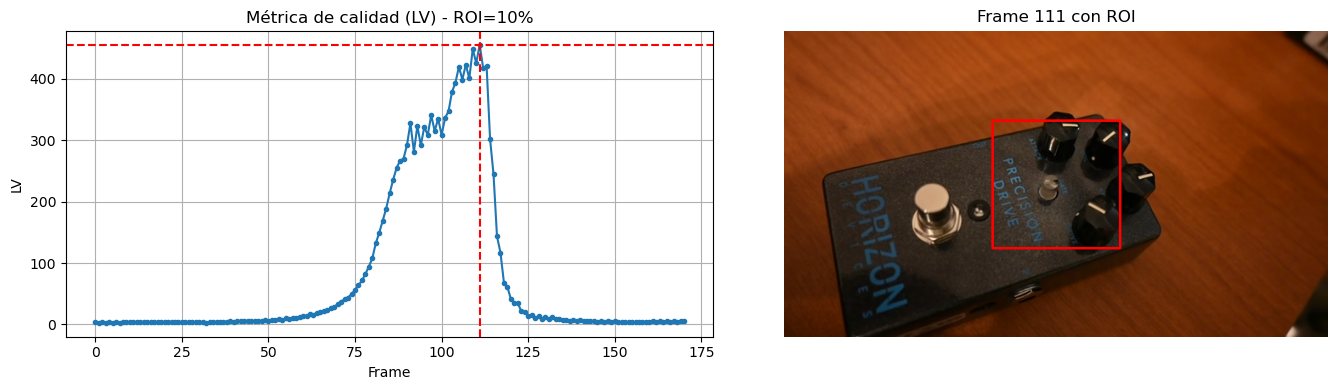

In [34]:
# Obtiene los valores de lv para todos los frames y el valor máximo con una roi centrada del 10% 

lv_values, frame_numbers, lv_max, lv_frame, rect = lv_laplacian_variance_roi_video(video_path, roi=0.1)

print(f"{'LV máximo':15}: {lv_max:.6f}")
print(f"{'Frame':15}: {lv_frame}")

# --- Cargar el frame del máximo ---
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, lv_frame)
ret, frame_max_img = cap.read()
cap.release()

# Convertir a RGB para matplotlib
frame_max_img = cv2.cvtColor(frame_max_img, cv2.COLOR_BGR2RGB)

# Dibujar ROI
x1, y1, x2, y2 = rect
frame_max_draw = frame_max_img.copy()
cv2.rectangle(frame_max_draw, (x1, y1), (x2, y2), (255, 0, 0), 2)

# --- Gráfico combinado ---
plt.figure(figsize=(14,4))

# Subplot izquierda: curva LV
plt.subplot(1, 2, 1)
plt.plot(frame_numbers, lv_values, marker='.')
plt.axhline(y=lv_max, color='red', linestyle='--', linewidth=1.5)
plt.axvline(x=lv_frame, color='red', linestyle='--', linewidth=1.5)
plt.title("Métrica de calidad (LV) - ROI=10%")
plt.xlabel("Frame")
plt.ylabel("LV")
plt.grid(True)

# Subplot derecha: frame con ROI
plt.subplot(1, 2, 2)
plt.imshow(frame_max_draw)
plt.title(f"Frame {lv_frame} con ROI")
plt.axis("off")

plt.tight_layout()
plt.show()


#### Medición sobre una grilla de MxN equidistante centrada en el frame.


--- Analizando grilla 3x3 ---
FM máximo      : 656.187298
Frame          : 97
Rect max       : (176, 144, 248, 216)


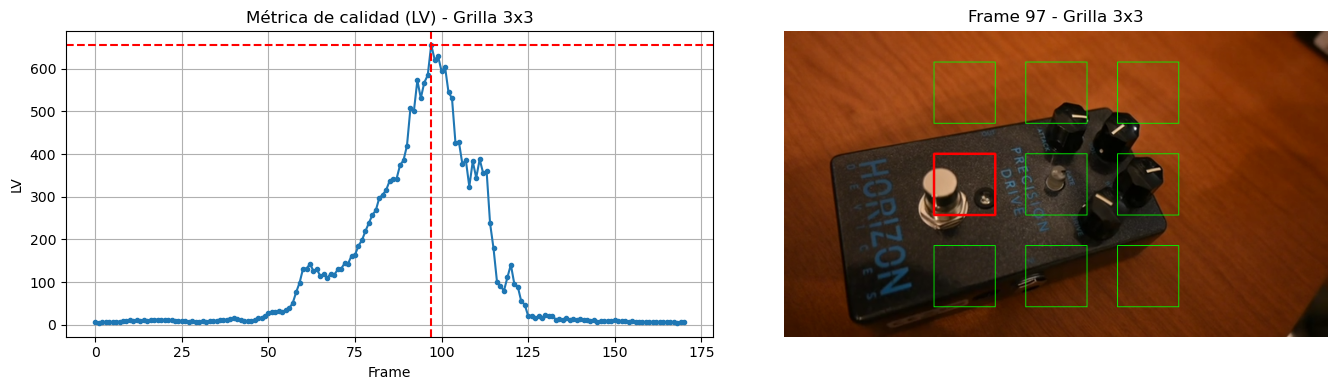


--- Analizando grilla 5x7 ---
FM máximo      : 1078.755744
Frame          : 111
Rect max       : (362, 89, 407, 134)


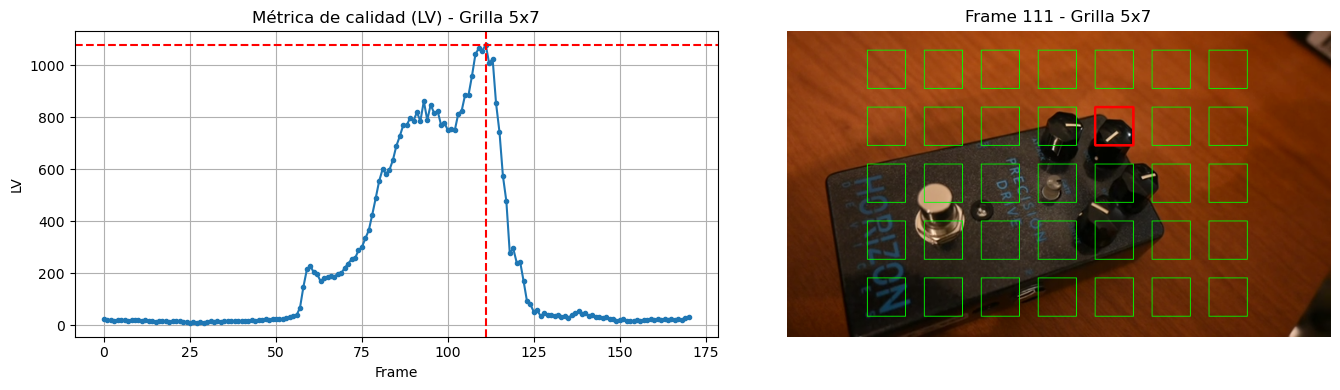


--- Analizando grilla 6x12 ---
FM máximo      : 1894.171080
Frame          : 89
Rect max       : (379, 86, 413, 120)


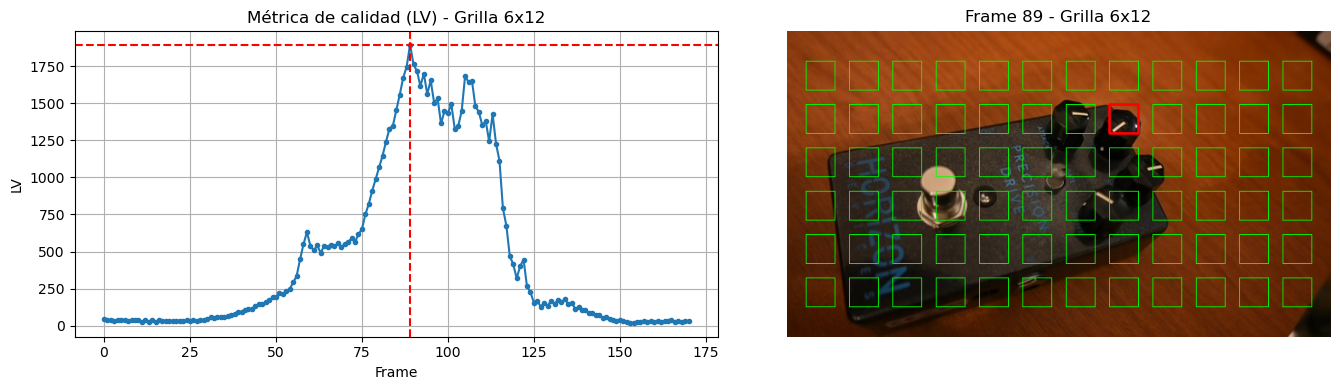

In [35]:
# --- Definir los tamaños de grilla que quieres probar ---

grid_sizes = [(3, 3), (5, 7), (6, 12)]

for N, M in grid_sizes:
    print(f"\n--- Analizando grilla {N}x{M} ---")

    # --- Obtener métricas del video ---
    lv_values, frame_numbers, lv_max, frame_max, rect_max, rect_matrices = lv_laplacian_variance_grid_video(
        video_path, N=N, M=M
    )

    print(f"{'FM máximo':15}: {lv_max:.6f}")
    print(f"{'Frame':15}: {frame_max}")
    print(f"{'Rect max':15}: {rect_max}")

    # --- Cargar el frame del máximo ---
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_max)
    ret, frame_img = cap.read()
    cap.release()

    frame_rgb = cv2.cvtColor(frame_img, cv2.COLOR_BGR2RGB)

    # --- Dibujar grilla completa y rect max ---
    frame_draw = frame_rgb.copy()
    rect_matrix = rect_matrices[frame_max]

    # Dibujar TODA la grilla (verde)
    for i in range(N):
        for j in range(M):
            x1, y1, x2, y2 = rect_matrix[i, j]
            cv2.rectangle(frame_draw, (x1, y1), (x2, y2), (0, 255, 0), 1)

    # Dibujar SOLO el rectángulo máximo en rojo
    x1, y1, x2, y2 = rect_max
    cv2.rectangle(frame_draw, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # --- GRÁFICO combinado ---
    plt.figure(figsize=(14, 4))

    # Subplot izquierda: curva FM
    plt.subplot(1, 2, 1)
    plt.plot(frame_numbers, lv_values, marker='.')
    plt.axhline(y=lv_max, color='red', linestyle='--', linewidth=1.5)
    plt.axvline(x=frame_max, color='red', linestyle='--', linewidth=1.5)
    plt.title(f"Métrica de calidad (LV) - Grilla {N}x{M}")
    plt.xlabel("Frame")
    plt.ylabel("LV")
    plt.grid(True)

    # Subplot derecha: frame con grilla y celda máxima
    plt.subplot(1, 2, 2)
    plt.imshow(frame_draw)
    plt.title(f"Frame {frame_max} - Grilla {N}x{M}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
